# Planning analysis

I updated the run_search.py script so it can run in AWS Lambda, with that in place it was very simple to run all the different search algorithms in not much time. However, even then, some of the algorithms would not complete. 

For all the algorithm that did complete i saved the data in a JSON file and created the following visualizations.

In [28]:
%matplotlib inline

import json
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

colors = ['#d7b30b', '#008b85', '#509ce4', '#085298', '#0b2c4b', 'red', 'green', 'blue', 'yellow', 'purple']

with open('data.json') as json_file:
    data = json.load(json_file)

    

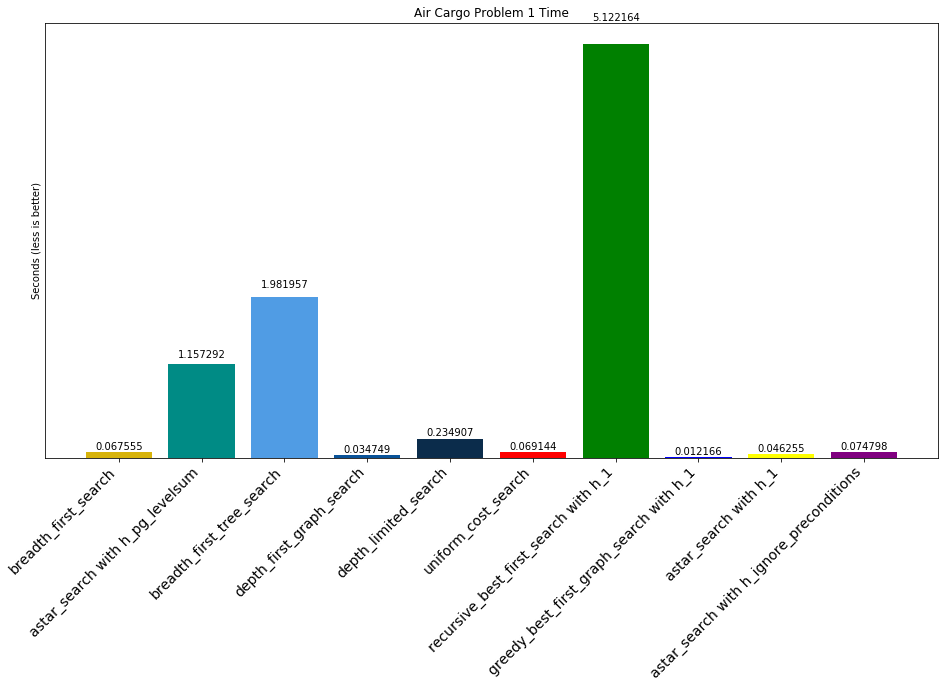

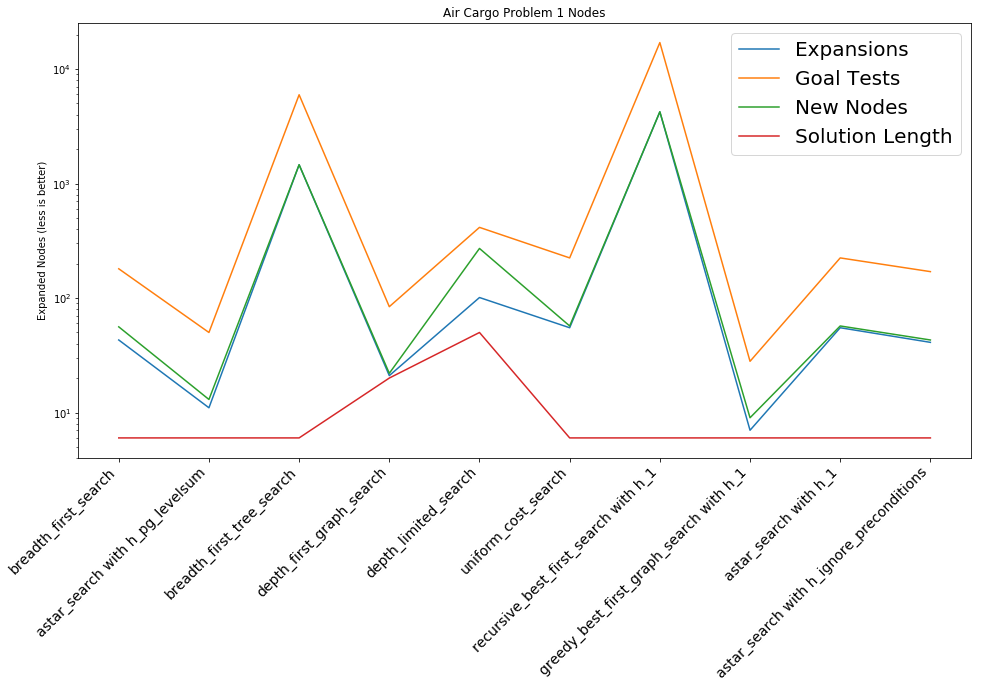

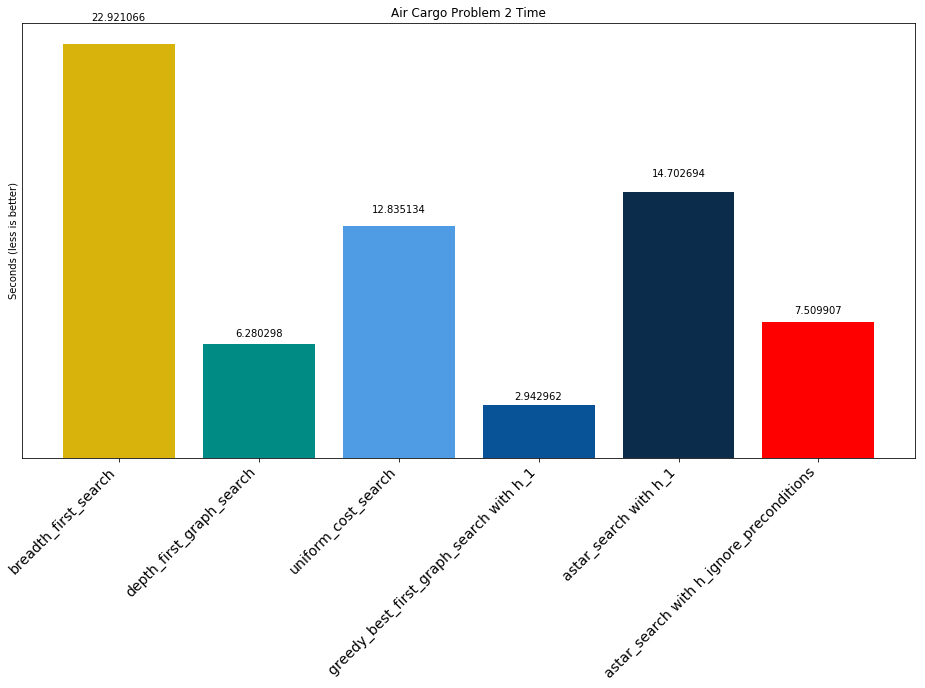

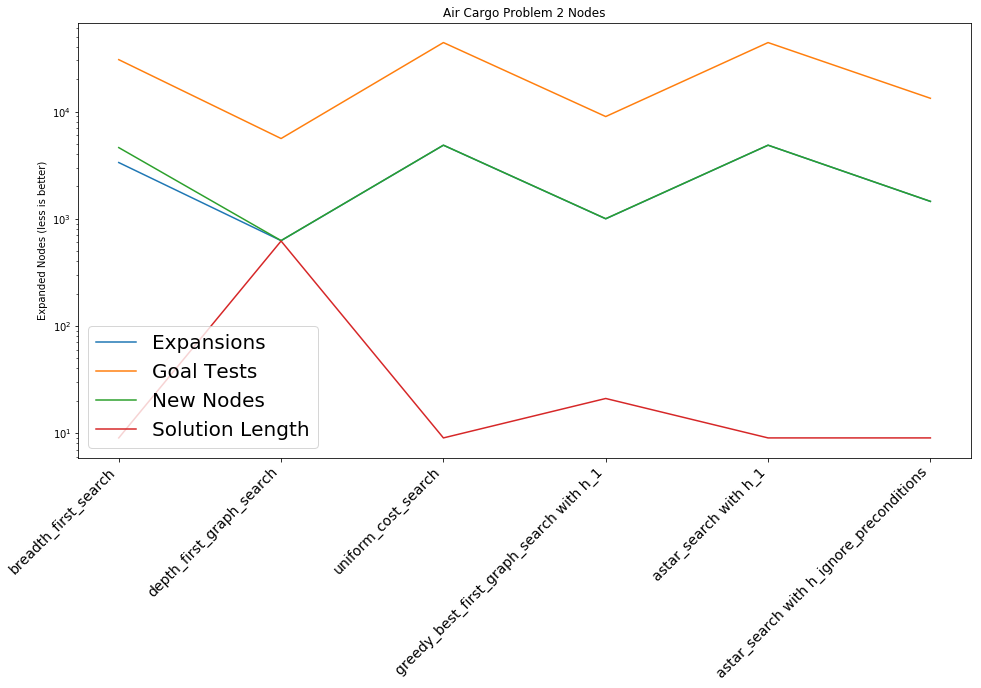

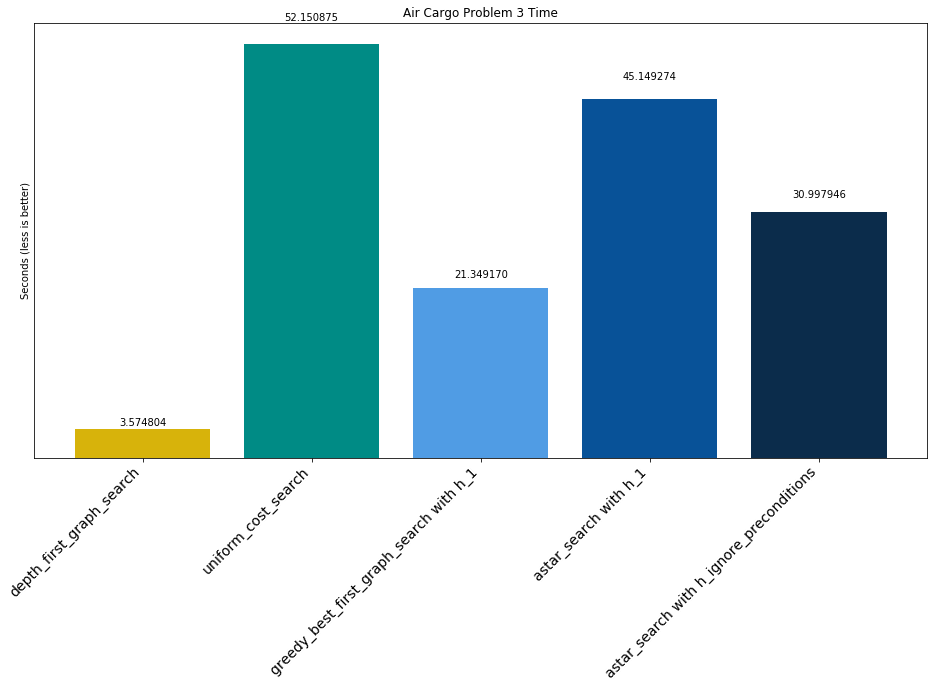

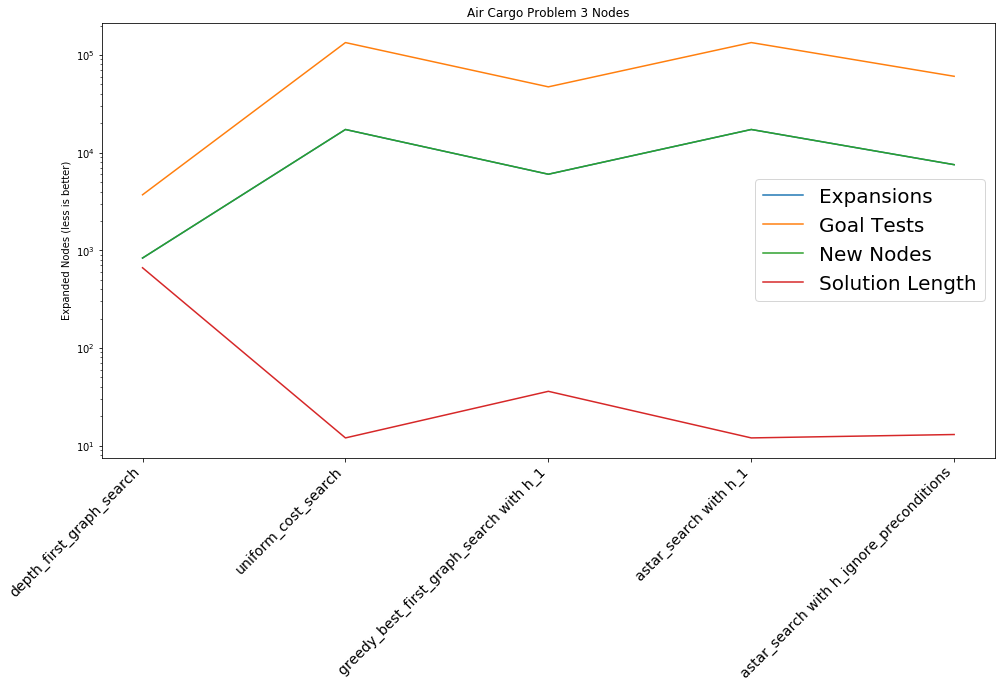

In [29]:

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % height,
                ha='center', va='bottom')

            
for group_name, grouped_data  in itertools.groupby(data, lambda _: _['problem']):
    #histogram
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(8)

    grouped = list(grouped_data)
    y = [v['data']['time'] for v in grouped]
    x = range(len(grouped))
    labels = [v['function'] + v.get('h', '') for v in grouped]
    
    rects = ax.bar(range(len(x)),y, color=colors)
    autolabel(rects)

    ax.set_ylabel('Seconds (less is better)')
    ax.set_yticks([])
    
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(labels, rotation=45, horizontalalignment='right', size=14)

    ax.set_title(group_name + ' Time')
    
    
    #Lines
    
    
    fig2, ax2 = plt.subplots()
    fig2.set_figwidth(16)
    fig2.set_figheight(8)
    y2 = [v['data']['problem']['succ'] for v in grouped]
    ax2.plot(x, y2)
    
    y3 = [v['data']['problem']['states'] for v in grouped]
    ax2.plot(x, y3)

    y4 = [v['data']['problem']['goal_tests'] for v in grouped]
    ax2.plot(x, y4)

    y5 = [v['data']['length'] for v in grouped]
    ax2.plot(x, y5)

    
    ax2.set_ylabel('Expanded Nodes (less is better)')
    
    
    ax2.set_xticks(range(len(x)))
    ax2.set_xticklabels(labels, rotation=45, horizontalalignment='right', size=14)

    ax2.set_title(group_name + ' Nodes')
    
    ax2.legend(['Expansions', 'Goal Tests', 'New Nodes', 'Solution Length'], prop={ 'size': 20})
    ax2.set_yscale("log", nonposy='clip')

    plt.show()


## Breadth first search and Depth first graph search


Looking at the visualizations we know that between **breadth_first_search** and **depth first graph search** the latter is the only that can complete the 3 problems.  We can also observe that **depth first graph search** is also one of the more performant algorithms, taking in general the least amount of time to complete. However, it also produces some of the least optimal solutions.


## A* and Heuristic search

For the A* algorithms with heuristics the most performant algorithm in general is the **greedy best first graph search with h1**, levelsum heuristics in general are not a good heuristic, they only work with problem 1 which is the simplest and are not the fastest. Good thing about the levelsum heuristic is that it generated an optimum plan, however for problem 1 most other algorithms did so as well.

Next i present the best solutions to all the problems

In [34]:
for problem_name, grouped_data  in itertools.groupby(data, lambda _: _['problem']):
    problem_data = list(grouped_data)
    best_plans_length = min(problem_data, key=lambda _: _['data']['length'])['data']['length']
    best_plans = list(filter(lambda _:_['data']['length'] == best_plans_length, problem_data))
    
    print(problem_name)
    print('There are {} optimal plans with a length of {}'.format(len(best_plans), best_plans_length))
    for plan in best_plans:
        print('\t', plan['function'], plan['h'])
        for action in plan['data']['actions']:
            print('\t\t', action)
        
        print()
        
    print()

Air Cargo Problem 1
There are 8 optimal plans with a length of 6
	 breadth_first_search 
		 Load(C1, P1, SFO)
		 Load(C2, P2, JFK)
		 Fly(P2, JFK, SFO)
		 Unload(C2, P2, SFO)
		 Fly(P1, SFO, JFK)
		 Unload(C1, P1, JFK)

	 astar_search  with h_pg_levelsum
		 Load(C1, P1, SFO)
		 Fly(P1, SFO, JFK)
		 Load(C2, P2, JFK)
		 Fly(P2, JFK, SFO)
		 Unload(C1, P1, JFK)
		 Unload(C2, P2, SFO)

	 breadth_first_tree_search 
		 Load(C1, P1, SFO)
		 Load(C2, P2, JFK)
		 Fly(P2, JFK, SFO)
		 Unload(C2, P2, SFO)
		 Fly(P1, SFO, JFK)
		 Unload(C1, P1, JFK)

	 uniform_cost_search 
		 Load(C1, P1, SFO)
		 Load(C2, P2, JFK)
		 Fly(P1, SFO, JFK)
		 Fly(P2, JFK, SFO)
		 Unload(C1, P1, JFK)
		 Unload(C2, P2, SFO)

	 recursive_best_first_search  with h_1
		 Load(C2, P2, JFK)
		 Load(C1, P1, SFO)
		 Fly(P2, JFK, SFO)
		 Unload(C2, P2, SFO)
		 Fly(P1, SFO, JFK)
		 Unload(C1, P1, JFK)

	 greedy_best_first_graph_search  with h_1
		 Load(C1, P1, SFO)
		 Load(C2, P2, JFK)
		 Fly(P1, SFO, JFK)
		 Fly(P2, JFK, SFO)
		